In [ ]:
%matplotlib notebook

In [1]:
# Dependencies and Setup
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import scipy.stats as sts
from scipy.stats import sem

In [2]:
# Study data files
# path of the data sets
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_metadata_study_results=mouse_metadata.merge(study_results, how='left', on='Mouse ID')

In [3]:
# Copy of the dataframe created
mousedata_study=mouse_metadata_study_results.copy()

# Renaming column 'Tumor Volume (mm3)' to 'Tumor_volume'
mousedata_study=mousedata_study.rename(columns={'Tumor Volume (mm3)':'Tumor_volume'})

# Display the data table for preview
mousedata_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
print("Number of mice: ", mousedata_study['Mouse ID'].count())

Number of mice:  1893


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouseid_timepoint_dupli=mousedata_study[mousedata_study.duplicated(['Mouse ID', 'Timepoint'])]
mouseid_timepoint_dupli

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_volume,Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Get all the data for the duplicate mouse ID.
mouseid_dupli=mousedata_study[mousedata_study.duplicated(['Mouse ID'])]
mouseid_dupli

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_volume,Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_data_results=mousedata_study.drop_duplicates(['Mouse ID'], inplace=False)

In [8]:
# Checking the number of mice in the clean DataFrame.
print("Number of mice after cleaning: ", cleaned_mouse_data_results['Mouse ID'].count())

# A copy of cleaned_mouse_data_results is created
cleaned_data_results=cleaned_mouse_data_results.copy()
cleaned_data_results

Number of mice after cleaning:  249


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
drug_regimen=mousedata_study.groupby('Drug Regimen')

# tumor_volume=clean_study_results['Tumor_volume']

mean_tvolume=drug_regimen.Tumor_volume.mean()
# print("The mean of tumor volume: ", mean_tvolume)

median_tvolume=drug_regimen.Tumor_volume.median()
# print("The median of tumor volume: ", median_tvolume)

# mode_tvolume = drug_regimen.Tumor_volume.agg(pd.Series.mode)
# # print("The mode of tumor volume: ", mode_tvolume)

var_tvolume=drug_regimen.Tumor_volume.var()
# print("The variance of tumor volume: ", var_tvolume)

std_tvolume=drug_regimen.Tumor_volume.std()
# print("The standard deviation of tumor volume: ", std_tvolume)

sem_tvolume=drug_regimen.Tumor_volume.sem()
# print(sem_tvolume)

# Assemble the resulting series into a single summary dataframe.
agg_tumor_volume=pd.DataFrame({"Mean":mean_tvolume, "Median":median_tvolume, "Variance":var_tvolume,
                              "Standard Deviation":std_tvolume, "SEM":sem_tvolume})

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
agg_tumor_volume

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Using the aggregation method, produce the same summary statistics in a single line
agg_summary=drug_regimen.agg({'Tumor_volume':['mean','median','var','std','sem']})
agg_summary = agg_summary.rename(columns={'Tumor_volume':''})
agg_summary

mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64


<AxesSubplot:title={'center':'Drug Regimen Tests in Mice'}, xlabel='Drug Regimen', ylabel='Number of Mice'>

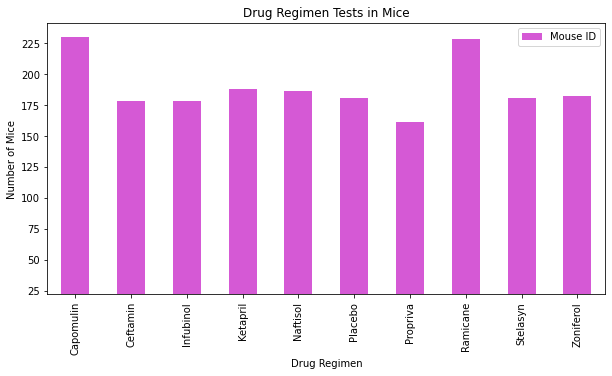

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
# cleaned_data_results is the unique 'Mouse ID' dataframe used for grouping by drug regimen
drug_reg= mousedata_study.groupby('Drug Regimen')['Mouse ID'].count()
print(drug_reg)
drug_reg.plot(kind='bar', figsize=(10,5), title='Drug Regimen Tests in Mice', legend='best',
              xlabel='Drug Regimen', ylabel='Number of Mice', ylim=22, stacked=True, color='m', alpha=0.65)

['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]


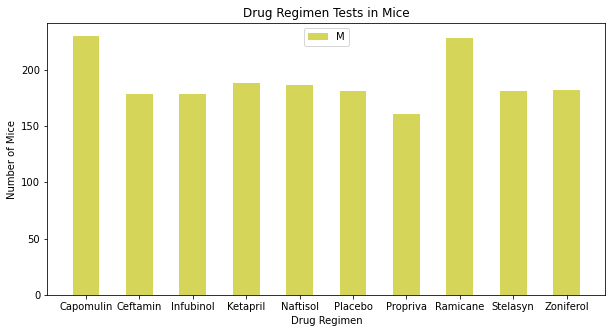

In [12]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

# drug_reg dataframe is grouped one by 'Drug Regimen' and 'Mouse ID'
# Index values of drug_reg dataframe is stored in to a list
num_mice= drug_reg.index.tolist()
print(num_mice)

# Finding positions of drug_reg values 
pos=np.arange(len(num_mice))
# print(pos)

# The values of drug_reg dataframe stored as a list
x_axis=list(drug_reg)
print(x_axis)

# Figure size fixing
plt.figure(figsize=(10,5))

# Plotting figure
plt.bar(pos, x_axis, color='y', alpha=0.65, width=0.5)

# Using xticks positional values are assigning
plt.xticks(pos, num_mice)

# Titling the bar graph
plt.title('Drug Regimen Tests in Mice')

# Labeling x_axix
plt.xlabel("Drug Regimen")

# Labeling y_axis
plt.ylabel('Number of Mice')

# Printing legend
plt.legend('Mouse ID', loc=9)


array([<AxesSubplot:ylabel='Mouse ID'>], dtype=object)

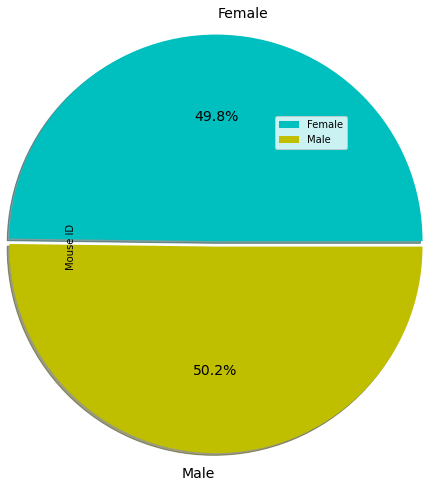

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
ml_fl_mice = cleaned_data_results.groupby('Sex')['Mouse ID'].count()

colors=['c', 'y']

explode = (0.05,0)

legend='Mouse ID'

ml_fl_mice.plot(kind='pie', subplots=True, figsize=(5,5), autopct='%1.1f%%', colors=colors,
               radius=1.9, explode=explode, fontsize=14, shadow=True, legend=1)

([<matplotlib.patches.Wedge at 0x1fa85a42550>,
 [Text(0.016969439434090898, 2.689946474955458, 'Male'),
  Text(-0.01665402234423823, -2.6399474698447616, 'Female')],
 [Text(0.00939942927761912, 1.4899703522987477, '49.8%'),
  Text(-0.009084012187766307, -1.4399713471880515, '50.2%')])

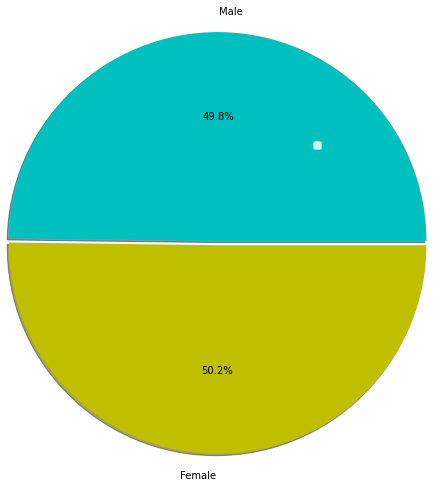

In [14]:
# Labels in a list
labels=['Male', 'Female']

legend=plt.legend(['Male', 'Female'])

# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(ml_fl_mice, labels=labels, colors=colors, autopct="%1.1f%%", radius=2.4, explode=explode, 
       shadow=True)

## Quartiles, Outliers and Boxplots

In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimen = mousedata_study.sort_values(by=['Drug Regimen','Mouse ID', 'Tumor_volume'],
                                               ascending=True)
treatment_regimen.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_volume,Metastatic Sites
307,b128,Capomulin,Female,9,22,35,37.967644,1
308,b128,Capomulin,Female,9,22,40,38.379726,2
309,b128,Capomulin,Female,9,22,45,38.982878,2
306,b128,Capomulin,Female,9,22,30,40.605335,1
304,b128,Capomulin,Female,9,22,20,42.731552,0


In [96]:
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = mousedata_study.Timepoint.max()
# print(last_timepoint)

# Dataframe to get the tumor volume at the last timepoint
last_tpoint_treat_regimen=treatment_regimen.loc[treatment_regimen.Timepoint ==last_timepoint].
last_tpoint_treat_regimen

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_volume,Metastatic Sites
309,b128,Capomulin,Female,9,22,45,38.982878,2
299,b742,Capomulin,Male,7,21,45,38.939633,0
244,g288,Capomulin,Male,3,19,45,37.074024,1
360,g316,Capomulin,Female,22,22,45,40.159220,2
440,i557,Capomulin,Female,1,24,45,47.685963,1
...,...,...,...,...,...,...,...,...
1344,p136,Zoniferol,Female,5,28,45,63.488697,2
1416,q511,Zoniferol,Female,2,28,45,68.611061,3
1434,q633,Zoniferol,Male,12,25,45,70.827796,2
1518,s337,Zoniferol,Male,14,27,45,62.109651,4


In [99]:
# Extracting drug regimen with Capomulin
caplin_reg = last_tpoint_treat_regimen[last_tpoint_treat_regimen['Drug Regimen'].isin(['Capomulin'])]

# Sorting values by Tumor Volume and resetting index
caplin_reg = caplin_reg.sort_values(by='Tumor_volume').reset_index()
# print(caplin_reg)

# Selecting Tumor Volume alone from the dataframe
capomulin_regimen = caplin_reg.Tumor_volume
capomulin_regimen

    index Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0      19     s185    Capomulin  Female           3          17         45   
1      39     m601    Capomulin    Male          22          17         45   
2      29     x401    Capomulin  Female          16          15         45   
3     104     u364    Capomulin    Male          18          17         45   
4     124     y793    Capomulin    Male          17          17         45   
5     134     r554    Capomulin  Female           8          17         45   
6     144     m957    Capomulin  Female           3          19         45   
7     164     t565    Capomulin  Female          20          17         45   
8     224     w914    Capomulin    Male          24          21         45   
9     244     g288    Capomulin    Male           3          19         45   
10    204     i738    Capomulin  Female          23          20         45   
11    337     j119    Capomulin  Female           7          23 

0     23.343598
1     28.430964
2     28.484033
3     31.023923
4     31.896238
5     32.377357
6     33.329098
7     34.455298
8     36.041047
9     37.074024
10    37.311846
11    38.125164
12    38.846876
13    38.939633
14    38.982878
15    40.159220
16    40.658124
17    40.728578
18    41.483008
19    41.581521
20    47.685963
Name: Tumor_volume, dtype: float64

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimen = list(mousedata_study.groupby('Mouse ID')['Drug Regimen', 'Tumor_volume'].min())

# Create empty list to fill with tumor vol data (for plotting)
tumor_treatment=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
